In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns

file = pd.read_csv("Data/UK_cars/toyota.csv")

file.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [2]:
file["model"] = [x.strip() for x in file.model]

In [3]:
mask = (file["model"] == "Aygo")|(file["model"] == "Yaris")
df2 = file.loc[mask,:]
df2

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
5603,Aygo,2017,9595,Automatic,7618,Other,145,67.3,1.0
5604,Aygo,2019,9694,Manual,100,Petrol,145,56.5,1.0
5605,Aygo,2018,9095,Automatic,7077,Other,145,67.0,1.0
5606,Aygo,2017,8690,Manual,2908,Petrol,0,68.9,1.0


In [4]:
df2.groupby("model").agg({"price":"mean"})

,price
model,
Aygo,7905.414584
Yaris,10553.083883


In [5]:
df2.groupby("model").agg({"price":"median"})

,price
model,
Aygo,7895.0
Yaris,10652.5


In [6]:
df2.groupby("model").agg({"price":"var"})

,price
model,
Aygo,2.764884e+06
Yaris,6.608439e+06


In [7]:
df2.groupby("model").agg({"price":"std"})

,price
model,
Aygo,1662.794122
Yaris,2570.688483


<AxesSubplot:xlabel='price', ylabel='Count'>

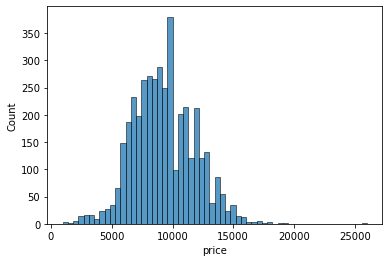

In [8]:
sns.histplot(data=df2, x="price")

<AxesSubplot:title={'center':'price'}, xlabel='model'>

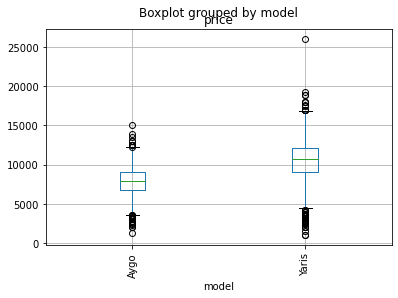

In [9]:
df2.boxplot(by ='model', column =["price"], grid = True, rot = 90)

In [10]:
maska = (df2["price"] < 25000) 
df3 = df2.loc[maska,:]
df3

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5
...,...,...,...,...,...,...,...,...,...
5603,Aygo,2017,9595,Automatic,7618,Other,145,67.3,1.0
5604,Aygo,2019,9694,Manual,100,Petrol,145,56.5,1.0
5605,Aygo,2018,9095,Automatic,7077,Other,145,67.0,1.0
5606,Aygo,2017,8690,Manual,2908,Petrol,0,68.9,1.0


<AxesSubplot:title={'center':'price'}, xlabel='model'>

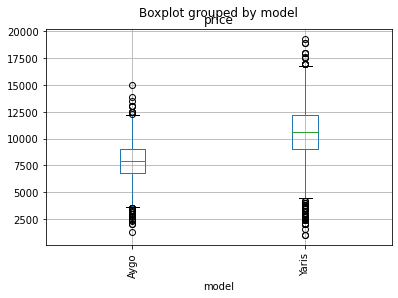

In [11]:
df3.boxplot(by ='model', column =["price"], grid = True, rot = 90)

<AxesSubplot:xlabel='price', ylabel='Count'>

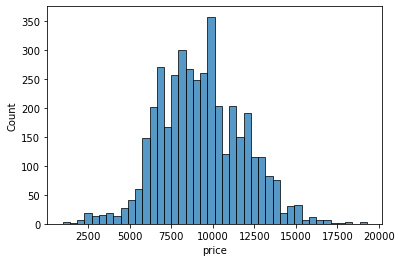

In [12]:
sns.histplot(data=df3, x="price")

In [13]:
df3.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
813,Yaris,2019,14000,Automatic,6821,Petrol,150,47.9,1.5
814,Yaris,2018,10750,Manual,14000,Petrol,145,58.9,1.5
815,Yaris,2016,11500,Automatic,31911,Hybrid,0,78.0,1.5
816,Yaris,2014,8500,Automatic,72053,Hybrid,0,76.3,1.5
817,Yaris,2017,8750,Manual,32594,Petrol,150,58.9,1.5


In [14]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats



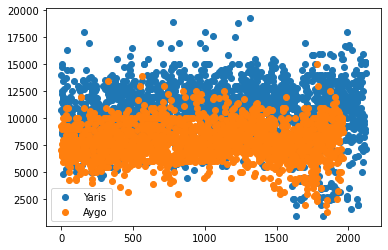

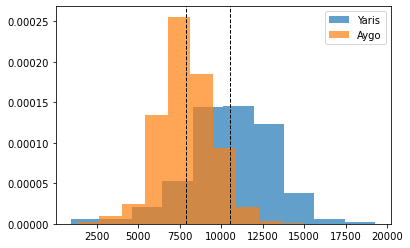

In [18]:
population1a = df3.loc[df3["model"]=="Yaris",:]
population2a= df3.loc[df3["model"]=="Aygo",:]
population1b = population1a["price"]
population2b = population2a["price"]

plt.scatter(range(len(population1b)), population1b, label="Yaris")
plt.scatter(range(len(population2b)), population2b, label="Aygo")
plt.legend()
plt.show()

plt.hist(population1b, 10, density=True, alpha=0.7, label="Yaris")
plt.hist(population2b, 10, density=True, alpha=0.7, label="Aygo")
plt.axvline(population1b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.show()


In [19]:
np.mean(population1b)

10545.803394625176

In [20]:
np.mean(population2b)

7905.414584395717

In [21]:
np.var(population1b)

6495961.578036574

In [22]:
np.var(population2b)

2763474.3559117196

In [23]:
stats.ttest_ind(population1b, population2b, equal_var=False)

Ttest_indResult(statistic=39.474492802499356, pvalue=1.8625242244512783e-284)

In [24]:
file2 = pd.read_csv("Data/UK_cars/ford.csv")

file2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [25]:
file2["model"] = [x.strip() for x in file2.model]

In [26]:
maskb = (file2["model"] == "Fiesta")|(file2["model"] == "Focus")
df2b = file2.loc[maskb,:]
df2b

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


In [27]:
df2b.groupby("model").agg({"price":"mean"})

,price
model,
Fiesta,10196.298002
Focus,13185.882956


<AxesSubplot:xlabel='price', ylabel='Count'>

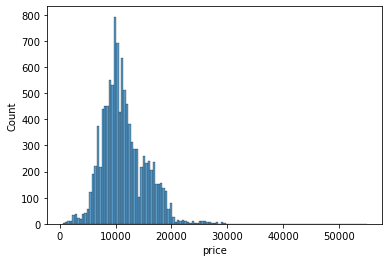

In [28]:
sns.histplot(data=df2b, x="price")

<AxesSubplot:title={'center':'price'}, xlabel='model'>

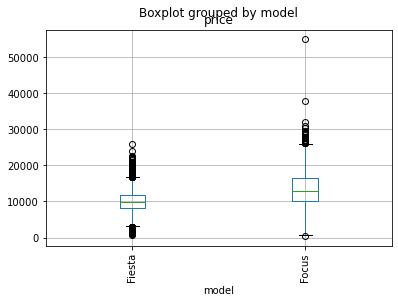

In [29]:
df2b.boxplot(by ='model', column =["price"], grid = True, rot = 90)

In [30]:
maske = (df2b["price"] < 35000) 
df3b = df2b.loc[maske,:]
df3b

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


<AxesSubplot:title={'center':'price'}, xlabel='model'>

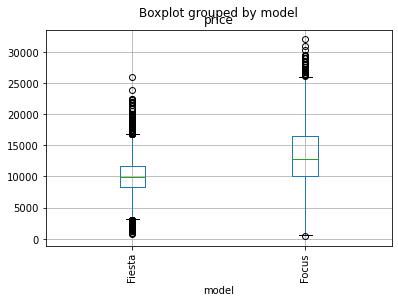

In [31]:
df3b.boxplot(by ='model', column =["price"], grid = True, rot = 90)

<AxesSubplot:xlabel='price', ylabel='Count'>

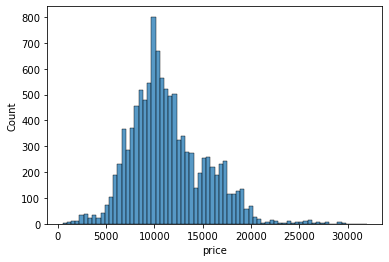

In [32]:
sns.histplot(data=df3b, x="price")

In [33]:
maskh = (((df3b["model"] == "Fiesta") & (df3b["price"] < 20000)) | ((df3b["model"] == "Focus") & (df3b["price"] < 27000)))
df3c = df3b.loc[maskh,:]
df3c

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17952,Fiesta,2017,9899,Automatic,16303,Petrol,0,57.7,1.0
17954,Focus,2016,16000,Manual,19834,Petrol,200,41.5,2.0
17955,Fiesta,2018,12500,Automatic,7047,Petrol,145,48.7,1.0
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2


<AxesSubplot:title={'center':'price'}, xlabel='model'>

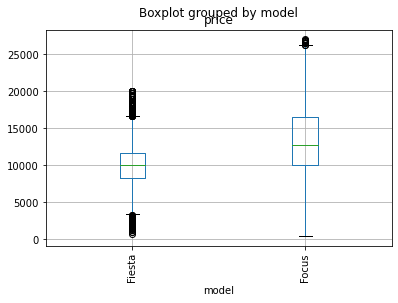

In [34]:
df3c.boxplot(by ='model', column =["price"], grid = True, rot = 90)

<AxesSubplot:xlabel='price', ylabel='Count'>

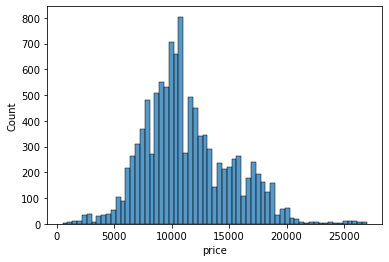

In [35]:
sns.histplot(data=df3c, x="price")

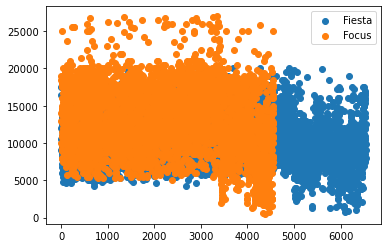

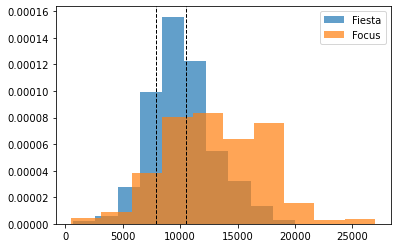

In [41]:
population1c =  df3c.loc[df3c["model"]=="Fiesta",:]
population2c= df3c.loc[df3c["model"]=="Focus",:]
population1d = population1c["price"]
population2d = population2c["price"]

plt.scatter(range(len(population1d)), population1d, label="Fiesta")
plt.scatter(range(len(population2d)), population2d, label="Focus")
plt.legend()
plt.show()

plt.hist(population1d, 10, density=True, alpha=0.7, label="Fiesta")
plt.hist(population2d, 10, density=True, alpha=0.7, label="Focus")
plt.axvline(population1b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2b.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
plt.show()


In [42]:
np.mean(population1d)

10165.540366972476

In [43]:
np.mean(population2d)

13083.716885964912

In [44]:
np.var(population1d)

7997103.740113615

In [45]:
np.var(population2d)

18576801.28234644

In [46]:
stats.ttest_ind(population1d, population2d, equal_var=False)

Ttest_indResult(statistic=-40.09278905193241, pvalue=0.0)